<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Stock_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from prophet import Prophet

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [6]:
m=Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzj0nck_/bg3rcfh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzzj0nck_/igc8la3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90225', 'data', 'file=/tmp/tmpzzj0nck_/bg3rcfh5.json', 'init=/tmp/tmpzzj0nck_/igc8la3q.json', 'output', 'file=/tmp/tmpzzj0nck_/prophet_modelzjsfhb7f/prophet_model-20230619170939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:09:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:09:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [8]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203190,7.559849,8.946600
3266,2017-01-16,8.528195,7.864060,9.225962
3267,2017-01-17,8.315591,7.537089,9.041843
3268,2017-01-18,8.148199,7.474501,8.913527
3269,2017-01-19,8.160106,7.404515,8.910771


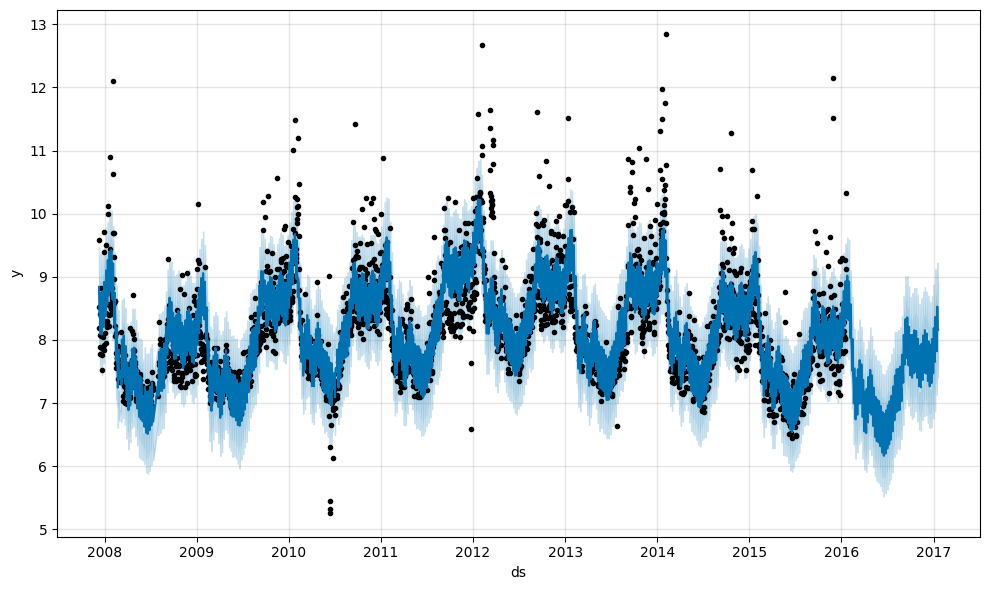

In [9]:
fig1=m.plot(forecast)

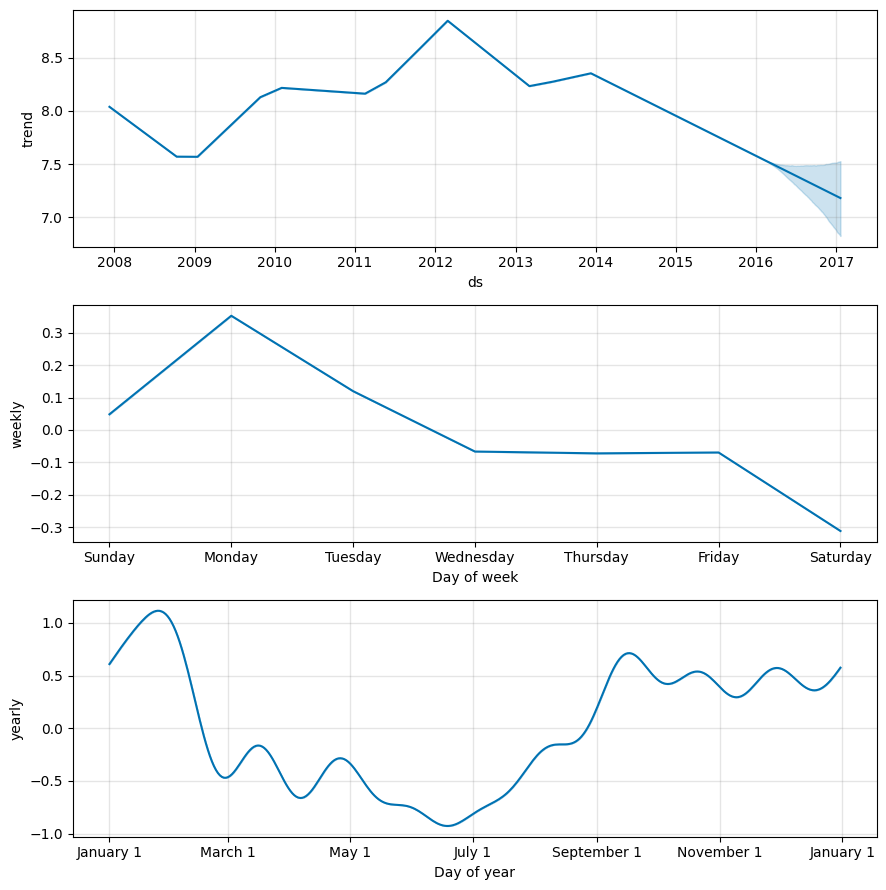

In [10]:
fig2=m.plot_components(forecast)

In [11]:
from prophet.plot import plot_plotly ,plot_components_plotly
plot_plotly(m,forecast)

In [12]:
plot_components_plotly(m,forecast)